# 1A - Enoncé 3 mars 2022- rattrapage

Correction de l'examen du 3 mars 2022.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

ModuleNotFoundError: No module named 'jyquickhelper'

In [89]:
from math import cos, sin, pi


def segment(x=0, y=0, angle=0, L=1, E=0.001):
    x2 = x + cos(angle) * L
    y2 = y + sin(angle) * L
    return dict(x1=x, y1=y, x2=x2, y2=y2, E=E, angle=angle)

segment()

{'x1': 0, 'y1': 0, 'x2': 1.0, 'y2': 0.0, 'E': 0.001, 'angle': 0}

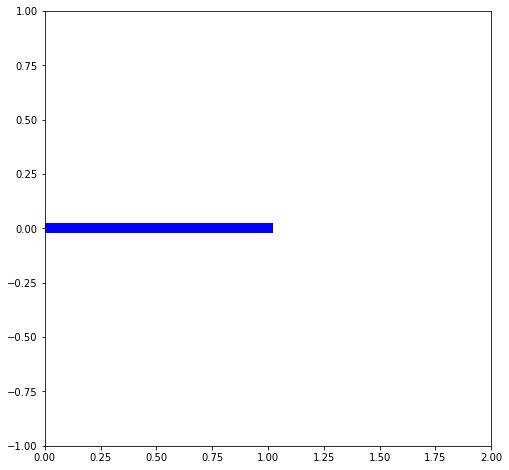

In [90]:
import matplotlib.pyplot as plt


def draw(segments, L=1):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    maxxy = 0
    for seg in segments:
        ax.plot([seg['x1'], seg['x2']], [seg['y1'], seg['y2']], 'b-', lw=seg['E'] * 10000)
    ax.set_xlim([0, 2 * L])
    ax.set_ylim([-L, L])
    return ax

draw([segment()]);

In [91]:
def distance(seg):
    x1, x2, y1, y2 = seg['x1'], seg['x2'], seg['y1'], seg['y2']
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

distance(segment())

1.0

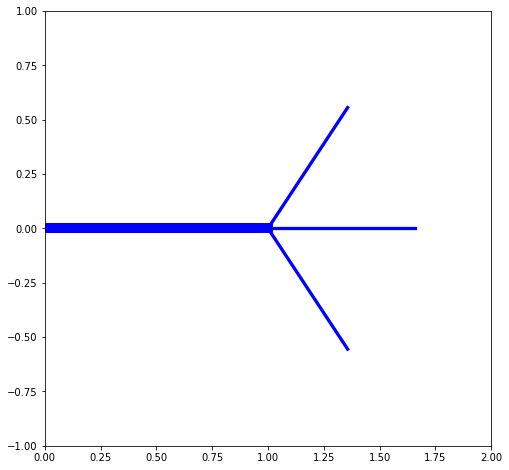

In [92]:
def tree3(seg, angle=pi/3, re=0.33, rl=0.66):
    x, y = seg['x2'], seg['y2']
    e = seg['E'] * re
    le = distance(seg) * rl
    a = seg['angle']
    segments = [
        segment(x, y, angle=a-angle, L=le, E=e),
        segment(x, y, angle=a, L=le, E=e),
        segment(x, y, angle=a+angle, L=le, E=e),
    ]
    return segments

premier = segment()
segs = [premier] + tree3(premier, 1)
draw(segs);

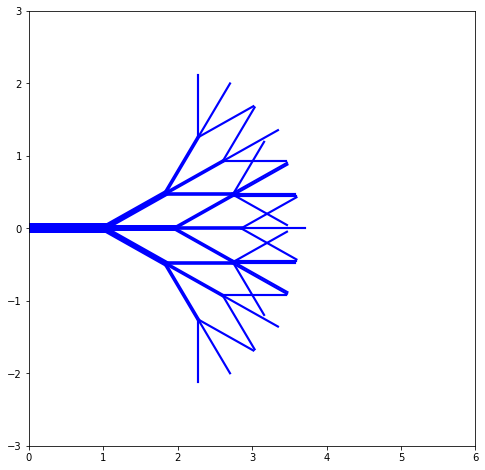

In [94]:
def tree_recursive(level, seg, angle=pi/6, re=0.6, rl=0.95):
    all_segs = [seg]
    iter_segs = [seg]
    for i in range(level):
        new_segs = []
        for seg in iter_segs:
            new_segs.extend(tree3(seg, angle=angle, re=re, rl=rl))
        all_segs.extend(new_segs)
        iter_segs = new_segs
    return all_segs

premier = segment()
segs = tree_recursive(3, premier)
draw(segs, L=3);

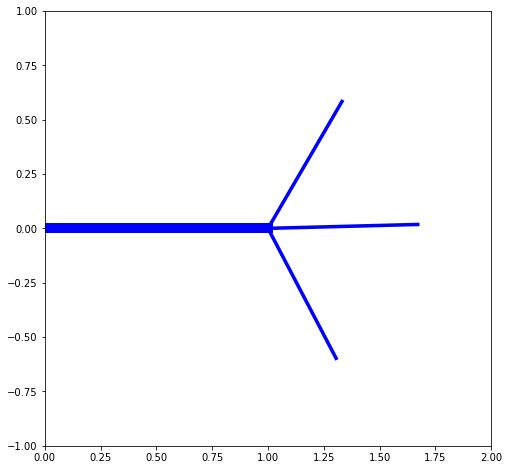

In [99]:
import random

def tree3_alea(seg, angle=pi/3, re=0.33, rl=0.66, rnd=0.1):
    re_rnd = re * (1 + random.random() * rnd)
    rl_rnd = rl * (1 + random.random() * rnd)
    
    x, y = seg['x2'], seg['y2']
    e = seg['E'] * re_rnd
    le = distance(seg) * rl_rnd

    a = seg['angle']
    a1 = a - (1 + random.random() * rnd) * angle
    a2 = a + random.random() * rnd * angle
    a3 = a + (1 + random.random() * rnd) * angle
    
    segments = [
        segment(x, y, angle=a1, L=le, E=e),
        segment(x, y, angle=a2, L=le, E=e),
        segment(x, y, angle=a3, L=le, E=e),
    ]
    return segments

premier = segment()
segs = [premier] + tree3_alea(premier, 1)
draw(segs);

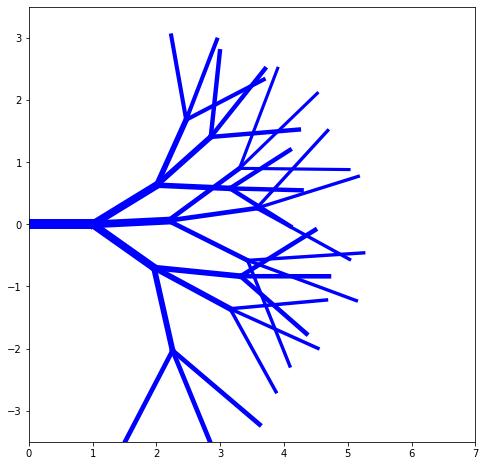

In [110]:
def tree_recursive_alea(level, seg, angle=pi/6, re=0.6, rl=0.95, rnd=0.4):
    all_segs = [seg]
    iter_segs = [seg]
    for i in range(level):
        new_segs = []
        for seg in iter_segs:
            new_segs.extend(tree3_alea(seg, angle=angle, re=re, rl=rl, rnd=rnd))
        all_segs.extend(new_segs)
        iter_segs = new_segs
    return all_segs

premier = segment()
segs = tree_recursive_alea(3, premier)
draw(segs, L=3.5);

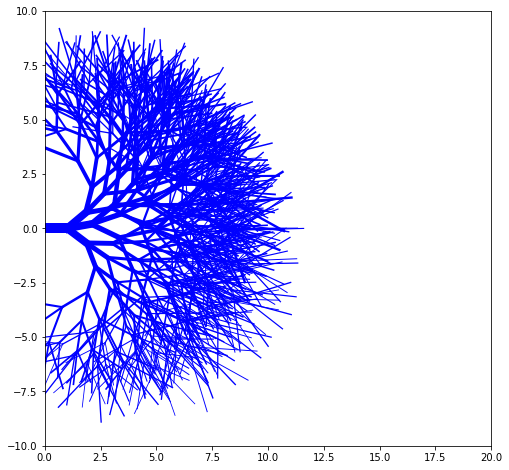

In [113]:
premier = segment()
segs = tree_recursive_alea(6, premier)
draw(segs, L=10);